In [4]:
import pandas as pd
import matplotlib.pyplot as plt

sub_df = pd.read_csv('data.csv', index_col=0)

# cutting off colums after 14
sub_df = sub_df.iloc[:,:14]
print(sub_df.shape)

# convert the datatype of Date in to datetime for filter
sub_df['Date'] = pd.to_datetime(sub_df['Date'])

# extract data after 2016/01/01
sub_df = sub_df[sub_df['Date'] >= '2016/01/01']

# drop na
sub_df = sub_df.dropna(axis=0)

print(sub_df.head())

(340539, 14)
              PdId  IncidntNum  Incident Code       Category  \
7   16010127305073   160101273           5073       BURGLARY   
8   17004924306243   170049243           6243  LARCENY/THEFT   
9   16065828006244   160658280           6244  LARCENY/THEFT   
10  18032260316100   180322603          16100  DRUG/NARCOTIC   
11  17612518006244   176125180           6244  LARCENY/THEFT   

                        Descript  DayOfWeek       Date   Time PdDistrict  \
7       BURGLARY, UNLAWFUL ENTRY  Wednesday 2016-02-03  20:30    MISSION   
8   PETTY THEFT FROM LOCKED AUTO  Wednesday 2017-01-18  18:20    TARAVAL   
9   GRAND THEFT FROM LOCKED AUTO     Sunday 2016-08-14  21:00    TARAVAL   
10          POSSESSION OF HEROIN    Tuesday 2018-05-01  13:27   SOUTHERN   
11  GRAND THEFT FROM LOCKED AUTO    Tuesday 2017-05-16  13:00   RICHMOND   

        Resolution                       Address           X          Y  \
7   ARREST, BOOKED         2300 Block of 16TH ST -122.409530  37.76571

In [5]:
print(sub_df['PdId'].unique()) # Large Random Numbers?
print(sub_df['PdDistrict'].unique()) # X, Y in place of District Areas

# drop PdId, PdDistrict
sub_df = sub_df.drop(columns = ['PdId', 'PdDistrict'])
print(sub_df.info())

[16010127305073 17004924306243 16065828006244 ... 17078486916110
 18014823304138 16044156851040]
['MISSION' 'TARAVAL' 'SOUTHERN' 'RICHMOND' 'BAYVIEW' 'NORTHERN' 'PARK'
 'CENTRAL' 'INGLESIDE' 'TENDERLOIN']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 340539 entries, 7 to 2129524
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   IncidntNum     340539 non-null  int64         
 1   Incident Code  340539 non-null  int64         
 2   Category       340539 non-null  object        
 3   Descript       340539 non-null  object        
 4   DayOfWeek      340539 non-null  object        
 5   Date           340539 non-null  datetime64[ns]
 6   Time           340539 non-null  object        
 7   Resolution     340539 non-null  object        
 8   Address        340539 non-null  object        
 9   X              340539 non-null  float64       
 10  Y              340539 non-null  float64       
 11  lo

In [6]:
# values in Category
print(sub_df['Category'].unique())
sub_df['Category'].unique().shape

['BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE'
 'VANDALISM' 'OTHER OFFENSES' 'DRUNKENNESS' 'ASSAULT' 'MISSING PERSON'
 'NON-CRIMINAL' 'ROBBERY' 'VEHICLE THEFT' 'SUSPICIOUS OCC' 'TRESPASS'
 'WARRANTS' 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY'
 'SEX OFFENSES, FORCIBLE' 'FRAUD' 'SECONDARY CODES' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'BRIBERY' 'ARSON' 'DISORDERLY CONDUCT' 'WEAPON LAWS'
 'LIQUOR LAWS' 'EXTORTION' 'SUICIDE' 'KIDNAPPING'
 'SEX OFFENSES, NON FORCIBLE' 'BAD CHECKS' 'EMBEZZLEMENT' 'LOITERING'
 'GAMBLING' 'TREA' 'PORNOGRAPHY/OBSCENE MAT']


(37,)

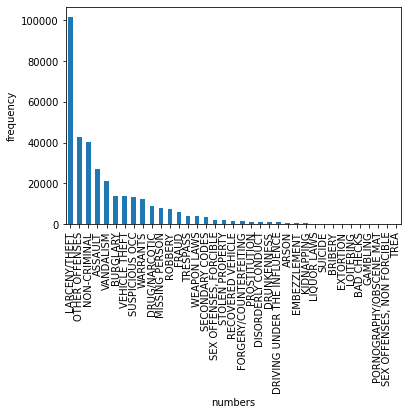

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sub_df['Category'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()

In [8]:
# frequency of each category
print(sub_df['Category'].value_counts())

LARCENY/THEFT                  101688
OTHER OFFENSES                  42690
NON-CRIMINAL                    40438
ASSAULT                         27043
VANDALISM                       21061
BURGLARY                        13715
VEHICLE THEFT                   13591
SUSPICIOUS OCC                  13502
WARRANTS                        12434
DRUG/NARCOTIC                    8936
MISSING PERSON                   7943
ROBBERY                          7545
FRAUD                            5992
TRESPASS                         3927
WEAPON LAWS                      3842
SECONDARY CODES                  3267
SEX OFFENSES, FORCIBLE           1907
STOLEN PROPERTY                  1900
RECOVERED VEHICLE                1447
FORGERY/COUNTERFEITING           1329
PROSTITUTION                     1206
DISORDERLY CONDUCT               1146
DRUNKENNESS                       886
DRIVING UNDER THE INFLUENCE       768
ARSON                             706
EMBEZZLEMENT                      397
KIDNAPPING  

In [9]:
# types of crime that we will ignore as they aren't important to our safety
# indexes = sub_df[(sub_df['Category'] == 'TREA') | (sub_df['Category'] == "PORNOGRAPHY/OBSCENE MAT")
#                            | (sub_df['Category'] == "GAMBLING") | (sub_df['Category'] == "BAD CHECKS")
#                            | (sub_df['Category'] == "LOITERING") | (sub_df['Category'] == "SUICIDE")
#                            | (sub_df['Category'] == "EMBEZZLEMENT") | (sub_df['Category'] == "FORGERY/COUNTERFEITING")
#                            | (sub_df['Category'] == "RECOVERED VEHICLE") | (sub_df['Category'] == "STOLEN PROPERTY")
#                            | (sub_df['Category'] == "SECONDARY CODES") | (sub_df['Category'] == "TRESPASS")
#                            | (sub_df['Category'] == "FRAUD") | (sub_df['Category'] == "WARRANT")
#                            | (sub_df['Category'] == "NON-CRIMINAL") | (sub_df['Category'] == "EXTORTION")
#                            | (sub_df['Category'] == "BRIBERY")].index

# sub_df.drop(indexes, inplace = True)

# indexes = sub_df[(sub_df['Category'] == "SECONDARY CODES") | (sub_df['Category'] == "OTHER OFFENSES")].index
# sub_df = sub_df.drop(columns = ['PdId', 'PdDistrict'])


# sub_df.drop(indexes, inplace = True)
sub_df = sub_df[sub_df.Category != 'SECONDARY CODES']
sub_df = sub_df[sub_df.Category != 'OTHER OFFENSES']



print(sub_df['Category'].unique())
sub_df['Category'].unique().shape

['BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE'
 'VANDALISM' 'DRUNKENNESS' 'ASSAULT' 'MISSING PERSON' 'NON-CRIMINAL'
 'ROBBERY' 'VEHICLE THEFT' 'SUSPICIOUS OCC' 'TRESPASS' 'WARRANTS'
 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY' 'SEX OFFENSES, FORCIBLE'
 'FRAUD' 'PROSTITUTION' 'RECOVERED VEHICLE' 'BRIBERY' 'ARSON'
 'DISORDERLY CONDUCT' 'WEAPON LAWS' 'LIQUOR LAWS' 'EXTORTION' 'SUICIDE'
 'KIDNAPPING' 'SEX OFFENSES, NON FORCIBLE' 'BAD CHECKS' 'EMBEZZLEMENT'
 'LOITERING' 'GAMBLING' 'TREA' 'PORNOGRAPHY/OBSCENE MAT']


(35,)

In [10]:
print(sub_df.head())

    IncidntNum  Incident Code       Category                      Descript  \
7    160101273           5073       BURGLARY      BURGLARY, UNLAWFUL ENTRY   
8    170049243           6243  LARCENY/THEFT  PETTY THEFT FROM LOCKED AUTO   
9    160658280           6244  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
10   180322603          16100  DRUG/NARCOTIC          POSSESSION OF HEROIN   
11   176125180           6244  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

    DayOfWeek       Date   Time      Resolution                       Address  \
7   Wednesday 2016-02-03  20:30  ARREST, BOOKED         2300 Block of 16TH ST   
8   Wednesday 2017-01-18  18:20            NONE        NORIEGA ST / SUNSET BL   
9      Sunday 2016-08-14  21:00            NONE         3200 Block of 20TH AV   
10    Tuesday 2018-05-01  13:27  ARREST, BOOKED     600 Block of STEVENSON ST   
11    Tuesday 2017-05-16  13:00            NONE  500 Block of JOHNFKENNEDY DR   

             X          Y                   

In [11]:
# Drop other irrelevant columns
sub_df = sub_df.drop(columns = 
                     ['IncidntNum',    # metadata
                      'Incident Code', # metadata
                      'Descript', # Descript replaced with Category
                      'Date',  # Same idea with DayOfWeek
                      'Resolution', # I think this is a dependent variable on Category
                      'Address']) # # X, Y is used instead

In [12]:
print(sub_df.columns)

Index(['Category', 'DayOfWeek', 'Time', 'X', 'Y', 'location'], dtype='object')


In [13]:
print(sub_df.head())

         Category  DayOfWeek   Time           X          Y  \
7        BURGLARY  Wednesday  20:30 -122.409530  37.765718   
8   LARCENY/THEFT  Wednesday  18:20 -122.495225  37.753412   
9   LARCENY/THEFT     Sunday  21:00 -122.475647  37.728528   
10  DRUG/NARCOTIC    Tuesday  13:27 -122.412652  37.779513   
11  LARCENY/THEFT    Tuesday  13:00 -122.466205  37.772541   

                                          location  
7    POINT (-122.40952991327822 37.76571843952822)  
8    POINT (-122.49522504431104 37.75341185338174)  
9    POINT (-122.47564746078615 37.72852806274647)  
10   POINT (-122.41265189435406 37.77951316688882)  
11  POINT (-122.46620466789287 37.772540539159316)  


['20:30' '18:20' '21:00' ... '05:26' '06:02' '05:16']


<AxesSubplot:>

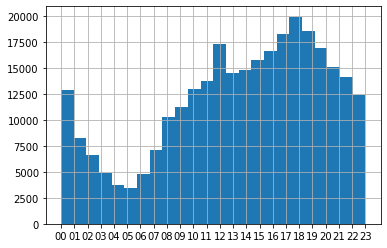

In [14]:
# replace Time column by hours
# print(sub_df['Time'].str.split(":"))
# for time in sub_df['Time']:
#     time = time.split(':')[0]

# for time in sub_df['Time']:
#     print(time)
import numpy as np
print(sub_df['Time'].unique())
sub_df['Time'] = sub_df['Time'].str.split(':').str[0] # Replace time with just hour

time_data = sub_df.sort_values(by=['Time'])
time_data = time_data['Time']

time_data.hist(bins = 24)

In [15]:
print(sub_df.head())

         Category  DayOfWeek Time           X          Y  \
7        BURGLARY  Wednesday   20 -122.409530  37.765718   
8   LARCENY/THEFT  Wednesday   18 -122.495225  37.753412   
9   LARCENY/THEFT     Sunday   21 -122.475647  37.728528   
10  DRUG/NARCOTIC    Tuesday   13 -122.412652  37.779513   
11  LARCENY/THEFT    Tuesday   13 -122.466205  37.772541   

                                          location  
7    POINT (-122.40952991327822 37.76571843952822)  
8    POINT (-122.49522504431104 37.75341185338174)  
9    POINT (-122.47564746078615 37.72852806274647)  
10   POINT (-122.41265189435406 37.77951316688882)  
11  POINT (-122.46620466789287 37.772540539159316)  


In [16]:
sub_df.Category.value_counts()

LARCENY/THEFT                  101688
NON-CRIMINAL                    40438
ASSAULT                         27043
VANDALISM                       21061
BURGLARY                        13715
VEHICLE THEFT                   13591
SUSPICIOUS OCC                  13502
WARRANTS                        12434
DRUG/NARCOTIC                    8936
MISSING PERSON                   7943
ROBBERY                          7545
FRAUD                            5992
TRESPASS                         3927
WEAPON LAWS                      3842
SEX OFFENSES, FORCIBLE           1907
STOLEN PROPERTY                  1900
RECOVERED VEHICLE                1447
FORGERY/COUNTERFEITING           1329
PROSTITUTION                     1206
DISORDERLY CONDUCT               1146
DRUNKENNESS                       886
DRIVING UNDER THE INFLUENCE       768
ARSON                             706
EMBEZZLEMENT                      397
KIDNAPPING                        383
LIQUOR LAWS                       174
SUICIDE     

In [17]:
# Missing person doesnt state whether or not its a kidnapping, so maybe combine both
cond1 = sub_df['Category'] == 'MISSING PERSON'
cond2 = sub_df['Category'] == 'KIDNAPPING'
sub_df.loc[cond1, 'Category'] = 'MISSING PERSON/ KIDNAPPING'
sub_df.loc[cond2, 'Category'] = 'MISSING PERSON/ KIDNAPPING'

# Suspicious occ is just any suspicious activites, maybe linked with disorderly conduct and drunkenness
cond1 = sub_df['Category'] == 'SUSPICIOUS OCC'
cond2 = sub_df['Category'] == 'DRUNKENNESS'
sub_df.loc[cond1, 'Category'] = 'DISORDERLY CONDUCT'
sub_df.loc[cond2, 'Category'] = 'DISORDERLY CONDUCT'

# Forcible = ability to consent, Non-Forcible = inability to consent
cond1 = sub_df['Category'] == 'SEX OFFENSES, NON FORCIBLE'
cond2 = sub_df['Category'] == 'SEX OFFENSES, FORCIBLE'
sub_df.loc[cond1, 'Category'] = 'SEX OFFENSES'
sub_df.loc[cond2, 'Category'] = 'SEX OFFENSES'

# CA Penal Code states that ARSON "A person is guilty of arson when they willfully and 
# maliciously sets fire to or burns or causes to be burned or who aids, counsels, or 
# procures the burning of, any structure, forest land, or property."
# Vandlism is maliciously damaging, destroying or defacing another person's property.
# could be in the same category, but arson is more heavily punished

# Robbery = force of coercion, Burglary = illegal entrance of property, Theft/Larceny = w/o the prev two conds
# Vehicle Theft may be considered Burglary since it requires illegal entrance of property
# maybe combine all 4?

# 

In [18]:
sub_df.Category.value_counts()

LARCENY/THEFT                  101688
NON-CRIMINAL                    40438
ASSAULT                         27043
VANDALISM                       21061
DISORDERLY CONDUCT              15534
BURGLARY                        13715
VEHICLE THEFT                   13591
WARRANTS                        12434
DRUG/NARCOTIC                    8936
MISSING PERSON/ KIDNAPPING       8326
ROBBERY                          7545
FRAUD                            5992
TRESPASS                         3927
WEAPON LAWS                      3842
SEX OFFENSES                     1912
STOLEN PROPERTY                  1900
RECOVERED VEHICLE                1447
FORGERY/COUNTERFEITING           1329
PROSTITUTION                     1206
DRIVING UNDER THE INFLUENCE       768
ARSON                             706
EMBEZZLEMENT                      397
LIQUOR LAWS                       174
SUICIDE                           171
BRIBERY                           149
EXTORTION                         135
LOITERING   

In [19]:
print(sub_df['Category'].unique())

['BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE'
 'VANDALISM' 'DISORDERLY CONDUCT' 'ASSAULT' 'MISSING PERSON/ KIDNAPPING'
 'NON-CRIMINAL' 'ROBBERY' 'VEHICLE THEFT' 'TRESPASS' 'WARRANTS'
 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY' 'SEX OFFENSES' 'FRAUD'
 'PROSTITUTION' 'RECOVERED VEHICLE' 'BRIBERY' 'ARSON' 'WEAPON LAWS'
 'LIQUOR LAWS' 'EXTORTION' 'SUICIDE' 'BAD CHECKS' 'EMBEZZLEMENT'
 'LOITERING' 'GAMBLING' 'TREA' 'PORNOGRAPHY/OBSCENE MAT']


In [20]:
crime_weights = {
    'BURGLARY':                    13,
    'LARCENY/THEFT':               12,
    'DRUG/NARCOTIC':               11,
    'DRIVING UNDER THE INFLUENCE': 16,
    'VANDALISM':                   6,
    'DISORDERLY CONDUCT':          6,
    'ASSAULT':                     17,
    'MISSING PERSON/ KIDNAPPING':  18,
    'NON-CRIMINAL':                4,
    'ROBBERY':                     13,
    'VEHICLE THEFT':               11,
    'TRESPASS':                    5,
    'WARRANTS':                    12,
    'FORGERY/COUNTERFEITING':      9,
    'STOLEN PROPERTY':             6,
    'SEX OFFENSES':                20,
    'FRAUD':                       8,
    'PROSTITUTION':                4,
    'RECOVERED VEHICLE':           6,
    'BRIBERY':                     7,
    'ARSON':                       14,
    'WEAPON LAWS':                 12,
    'LIQUOR LAWS':                 4,
    'EXTORTION':                   9,
    'SUICIDE':                     8,
    'BAD CHECKS':                  3,
    'EMBEZZLEMENT':                6,
    'LOITERING':                   4,
    'GAMBLING':                    2,
    'TREA':                        5,
    'PORNOGRAPHY/OBSCENE MAT':     4
}

crime_weights_list = []
for key, value in crime_weights.items():
    crime_weights_list.append(key)
    
categories_list = sub_df['Category'].unique()

# Confirm dictionary names are same as category names
print(crime_weights_list == categories_list)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [21]:
weights_df = sub_df
weights_df['crime_weight'] = weights_df['Category'].map(crime_weights)


# weights_df = sub_df.assign(crime_weight=0)
print(weights_df.head())
print(weights_df.shape)

         Category  DayOfWeek Time           X          Y  \
7        BURGLARY  Wednesday   20 -122.409530  37.765718   
8   LARCENY/THEFT  Wednesday   18 -122.495225  37.753412   
9   LARCENY/THEFT     Sunday   21 -122.475647  37.728528   
10  DRUG/NARCOTIC    Tuesday   13 -122.412652  37.779513   
11  LARCENY/THEFT    Tuesday   13 -122.466205  37.772541   

                                          location  crime_weight  
7    POINT (-122.40952991327822 37.76571843952822)            13  
8    POINT (-122.49522504431104 37.75341185338174)            12  
9    POINT (-122.47564746078615 37.72852806274647)            12  
10   POINT (-122.41265189435406 37.77951316688882)            11  
11  POINT (-122.46620466789287 37.772540539159316)            12  
(294582, 7)


In [22]:
weights_df.to_csv('processed_data.csv')